# Lecture 3 Regression
In this section, we will explore linear regression using Python. The lab involves importing necessary libraries, exploring dataset loading, and applying linear regression models. We will break it down into multiple steps, starting with importing standard and additional packages.

###  Importing Packages
Before we begin, we import some essential libraries and new ones for this lab. Keeping imports organized near the top helps in maintaining clarity throughout the notebook.

In [ ]:
# Standard libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Importing Statsmodels library for statistical modeling
import statsmodels.api as sm

### New Imports

In this section, we introduce new functions and libraries that are specifically required for linear regression and model diagnostics. Importing these objects at the beginning of the notebook ensures the code remains readable and the namespace stays clean.

Below, we introduce two new imports from `statsmodels`:

- **Variance Inflation Factor (VIF)**: This is a measure to detect multicollinearity between the features.
- **ANOVA**: Used for comparing linear regression models.

In [ ]:
# Importing specific objects to keep the namespace clean
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

### Using Functions from the ISLP Package

Throughout this lab, we will use several functions that are available in the `ISLP` package. This package provides tools specifically designed for learning statistical programming and can help simplify data loading and preprocessing tasks.

In [ ]:
!pip install ISLP
# Importing the ISLP package for loading data
from ISLP import load_data

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=ee6c2488b53bf2a612c9d79ab7cd62f73b8d9aa55ea7fc441285f26b0fbbf636
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [ ]:
Boston = load_data("Boston")
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Fitting a Simple Linear Regression Model with `smf.ols`

We will now fit a simple linear regression model where the response variable is `medv` (median house value) and the predictor is `lstat` (percentage of low-income households). We will use `smf.ols` to specify the formula for this regression model.

In [ ]:
# Fit the simple linear regression model using smf.ols
model = smf.ols(formula='medv ~ lstat', data=Boston)
results = model.fit()

# Display a summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        13:29:25   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

### Interpreting the Regression Output

The regression output provides important information such as:

- **Coefficient estimates**: The intercept and the slope for `lstat`.
- **P-values**: These help determine the statistical significance of the coefficients.
- **R-squared**: This measures how well the model explains the variability in the response variable.

For this simple linear regression model, we can see how `lstat` (percentage of low-income households) affects `medv` (median house value).

### Predictions and Confidence Intervals

We can now use the fitted model to make predictions. Let's create a new dataset containing hypothetical values of `lstat` and predict the corresponding `medv` values using the `.get_prediction()` method.

In [ ]:
# Create a new dataframe with hypothetical values of lstat
new_data = pd.DataFrame({'lstat': [5, 10, 15]})

# Make predictions for these values
new_predictions = results.get_prediction(new_data)

# View the predicted mean values
print(new_predictions.predicted_mean)

# Display the confidence intervals for the predictions
print(new_predictions.conf_int(alpha=0.05))

# Display the prediction intervals
print(new_predictions.conf_int(obs=True, alpha=0.05))

[29.80359411 25.05334734 20.30310057]
[[29.00741194 30.59977628]
 [24.47413202 25.63256267]
 [19.73158815 20.87461299]]
[[17.56567478 42.04151344]
 [12.82762635 37.27906833]
 [ 8.0777421  32.52845905]]


### Visualizing the Linear Regression Model

We can plot the regression line along with the actual data points to visualize the fit of the model.

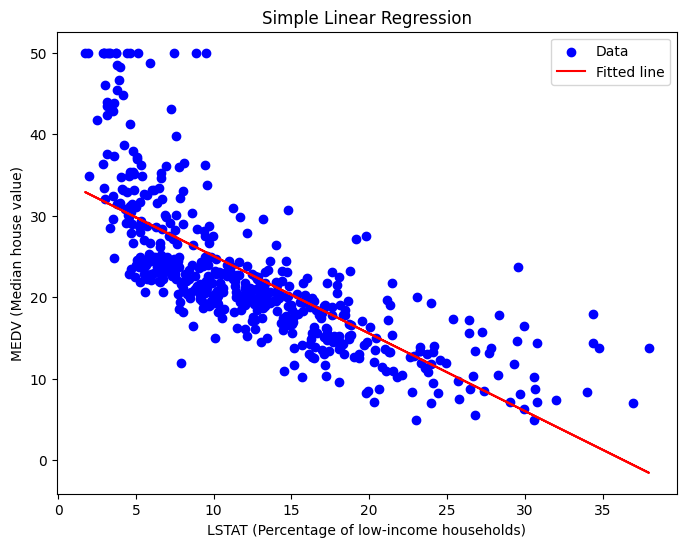

In [ ]:
# Plotting the regression line
plt.figure(figsize=(8,6))
plt.scatter(Boston['lstat'], Boston['medv'], label="Data", color="blue")
plt.plot(Boston['lstat'], results.fittedvalues, color="red", label="Fitted line")
plt.xlabel('LSTAT (Percentage of low-income households)')
plt.ylabel('MEDV (Median house value)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

### Multiple Linear Regression
In this section, we will perform multiple linear regression using Python's `statsmodels` library. We aim to predict `medv` (median house value) using multiple predictors, starting with two variables: `lstat` (percentage of low-income households) and `age` (proportion of owner-occupied units built prior to 1940).

In [ ]:
# Fit the multiple linear regression model with lstat and age as predictors
model = smf.ols(formula='medv ~ lstat + age', data=Boston)
results = model.fit()

# Display the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           2.98e-88
Time:                        14:20:31   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

### Fitting a Multiple Linear Regression Model with All Predictors

Instead of typing each predictor manually, we can use all predictors available in the dataset (excluding the response variable `medv`). This can be done more efficiently using the `.drop()` method in `pandas`.

In [ ]:
# Use all predictors in the dataset (excluding 'medv')
predictors = Boston.columns.drop('medv')
formula = 'medv ~ ' + ' + '.join(predictors)

# Fit the multiple linear regression model using all predictors
model_all = smf.ols(formula=formula, data=Boston)
results_all = model_all.fit()

# Display the summary of the regression results
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          2.23e-133
Time:                        14:20:37   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

### Fitting a Model Excluding Insignificant Predictors

If we want to exclude a predictor that has a high p-value (e.g., `age`), we can remove it from the model. This allows us to see how the model performs without including variables that don't contribute much to predicting the outcome.

In [ ]:
# Exclude the 'age' predictor and fit the model again
predictors_minus_age = Boston.columns.drop(['medv', 'age'])
formula_minus_age = 'medv ~ ' + ' + '.join(predictors_minus_age)

# Fit the multiple linear regression model excluding 'age'
model_minus_age = smf.ols(formula=formula_minus_age, data=Boston)
results_minus_age = model_minus_age.fit()

# Display the summary of the regression results
print(results_minus_age.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          2.03e-134
Time:                        14:20:40   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5251      4.920      8.441      0.0

### OLS Regression with CHAS (Dummy Variable)

In this section, we will run an OLS regression where `chas` is the independent variable. `chas` is a dummy variable that takes the value 1 if the tract bounds the Charles River and 0 otherwise. The dependent variable will be `medv`, the median home price.

In [ ]:
# Fit an OLS regression model with 'CHAS' as the independent variable
model_chas = smf.ols(formula='medv ~ chas', data=Boston).fit()

# Display the summary of the regression results
print(model_chas.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           7.39e-05
Time:                        14:20:44   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0938      0.418     52.902      0.0

In [ ]:
# Fit a multiple regression model with interaction term (CHAS * LSTAT)
model_interaction = smf.ols(formula='medv ~ chas * lstat', data=Boston).fit()

# Display the summary of the regression results
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     220.8
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           2.68e-91
Time:                        14:20:47   Log-Likelihood:                -1627.4
No. Observations:                 506   AIC:                             3263.
Df Residuals:                     502   BIC:                             3280.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.7672      0.570     59.222      0.0